In [1]:
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import re

In [2]:
url = "https://es.wikipedia.org/wiki/Ciencia_de_datos"
response = requests.get(url)
print(response) #200 request is success!

<Response [200]>


In [3]:
html = response.content #source code
soup = bs(html, 'lxml') #Transform

In [4]:
title = soup.find_all('h2')[5]
par = soup.find_all('p')[23:31]
lists = soup.find_all('ul')[3:5]
subtitle = soup.find_all('h3')[2]
enum = soup.find_all('ol')[0]

text_chunks = [title, par[0], lists[0], par[1], enum, par[2:5], subtitle, par[5:10], lists[1]]
text_chunks = [val for sublist in text_chunks for val in sublist]

In [5]:
txt = ''

for chunk in text_chunks:
    txt += ' '+chunk.get_text()
    
# remove unwanted elements using regex
txt = re.sub(r'\[[0-9]+\]', '', txt)  # remove footnotes
txt = re.sub(r'\{.*?\}', '', txt)  # remove templates
txt = re.sub(r'\(.*?\)', '', txt)  # remove parentheses
txt = re.sub(r'<.*?>', '', txt)  # remove HTML tags
txt = re.sub(r'\[.*?\]', '', txt)  # remove HTML tags
txt = re.sub(r'\n', '', txt)  # remove \n
txt = re.sub(r'^\s+', '', txt)  # remove spaces at beginning
txt = re.sub(r'\s+$', '', txt)  # remove spaces at beginning

save text

In [6]:
f = open("text_DS_wikipedia.txt", "w")
f.write(txt)
f.close()

Remove names

In [7]:
txt_names = re.sub(r'Nathan Yau', '', txt)
txt_names = re.sub(r'Benjamin Fry', '', txt_names)
txt_names = re.sub(r'Fry', '', txt_names)
txt_names = re.sub(r'Drew Conway', '', txt_names)
txt_names = re.sub(r'Google', '', txt_names)
txt_names = re.sub(r'Thomas H.', '', txt_names)
txt_names = re.sub(r'Davenport', '', txt_names)
txt_names = re.sub(r'McKinsey', '', txt_names)

In [8]:
desc_txt = re.sub(r'[-:.,/+°#;_\(\)*”&"º<]',' ', txt_names)
desc_txt = re.sub('\u200b',' ', desc_txt)
desc_txt = re.sub('\s{2,}',' ', desc_txt)
desc_txt = re.sub(r'\s+$', '', desc_txt)  # remove spaces at beginning
desc_txt = desc_txt.lower()

chunk text and remove stop words

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

In [10]:
#We initialize the stopwords variable, which is a list of words like "The," "I," "and," etc. that don't hold much value as keywords.
stop_words = stopwords.words('spanish')

wordcloud = WordCloud(width = 800, height = 800,
                background_color="#F5F5F5", 
                mode="RGBA",
                max_words=60,
                colormap='winter',
                stopwords = stop_words,
                min_font_size = 20).generate(desc_txt)

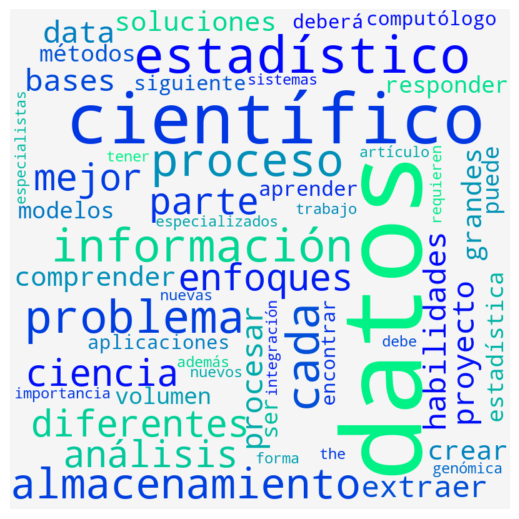

In [11]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('word_cloud.jpg', bbox_inches='tight') 